In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
file_path = "airquality.csv"
df = pd.read_csv(file_path)


In [6]:
df.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
print(df.isnull().sum())


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


C:\Users\Ashu\AppData\Local\Temp\ipykernel_12616\3943374674.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Air Quality', data=df, palette='viridis')


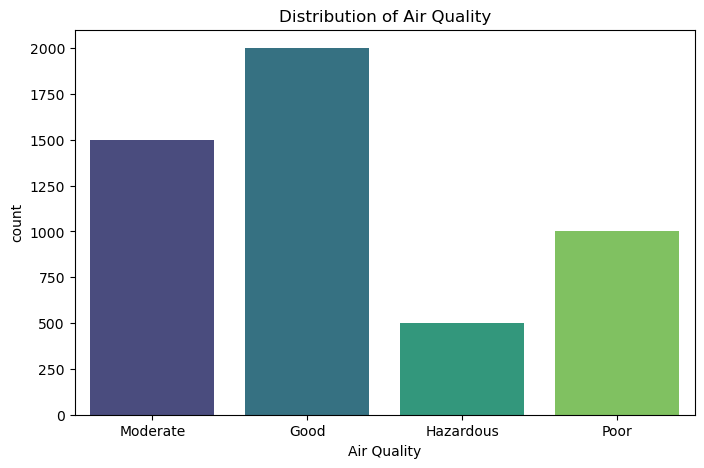

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Air Quality', data=df, palette='viridis')
plt.title('Distribution of Air Quality')
plt.show()


In [20]:
print(df.dtypes)



Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object


In [167]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [169]:
# Initialize the label encoder
label_encoder = LabelEncoder()

In [171]:
# Normalize the feature columns
feature_columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [22]:
df['Air Quality'] = df['Air Quality'].astype(str).str.strip()  # Remove spaces
df['Air Quality'] = df['Air Quality'].map({'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3})


In [24]:
print(df['Air Quality'].unique())  # Ensure all values are numeric
print(df.isnull().sum())  # Check for any remaining NaN values


[1 0 3 2]
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [26]:
df['Air Quality'].fillna(df['Air Quality'].mode()[0], inplace=True)


C:\Users\Ashu\AppData\Local\Temp\ipykernel_12616\952987645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Air Quality'].fillna(df['Air Quality'].mode()[0], inplace=True)


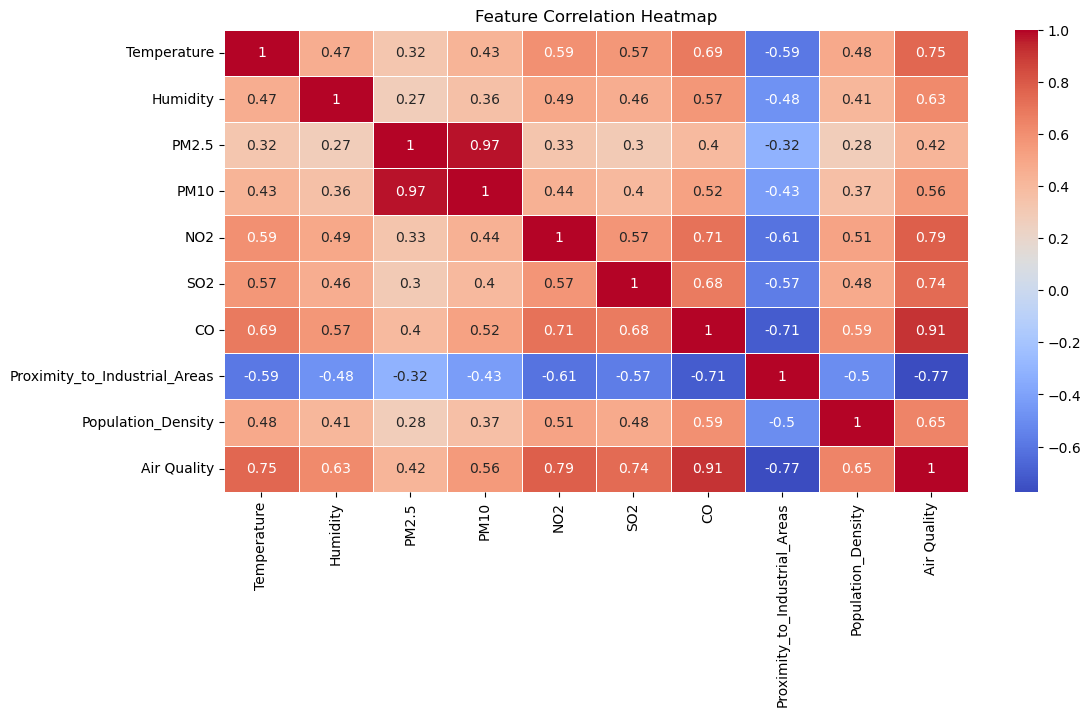

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [32]:
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])


In [34]:
X = df.drop(columns=['Air Quality'])  # Features
y = df['Air Quality']  # Target variable


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='mlogloss')  # Remove use_label_encoder
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
y_pred = model.predict(X_test)


In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


In [46]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.95      0.96       294
           2       0.87      0.93      0.90       186
           3       0.95      0.89      0.92       111

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



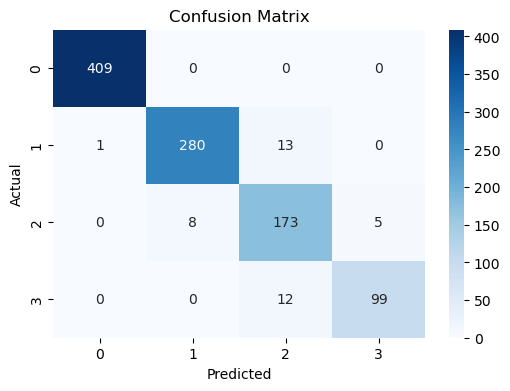

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\Ashu\AppData\Local\Temp\ipykernel_12616\3840896842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=X.columns, palette='coolwarm')


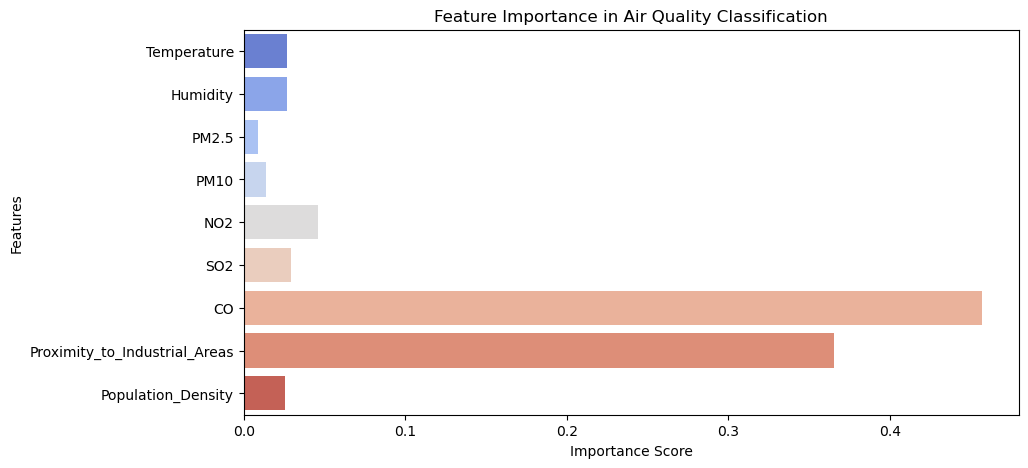

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns, palette='coolwarm')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Air Quality Classification')
plt.show()


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds) * 100:.2f}%")


XGBoost Accuracy: 96.10%


In [64]:

!pip install shap


   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ---------------------------------------- 531.1/531.1 kB 8.7 MB/s eta 0:00:00


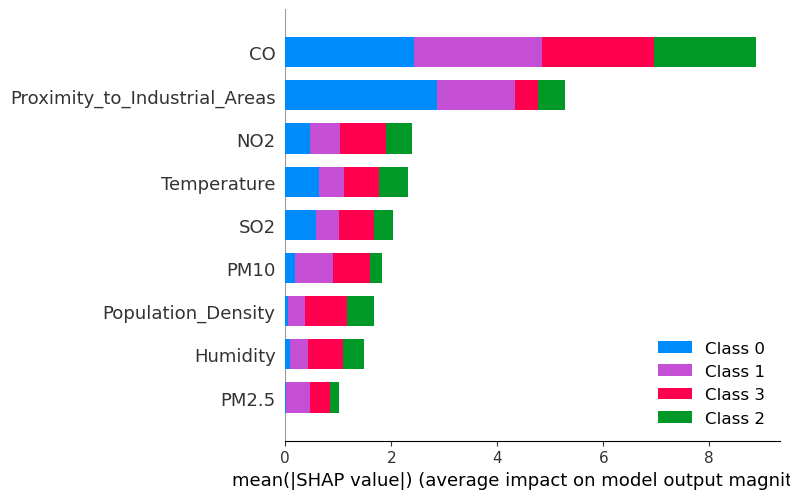

In [66]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [70]:
!pip install folium


In [83]:
!pip install -U scikit-learn



In [93]:
from sklearn.model_selection import GridSearchCV



In [96]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[30, 80], zoom_start=5)
HeatMap(df[['lat', 'lon', 'PM2.5']].values).add_to(m)
m



Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
dtype: int64
0


C:\Users\Ashu\AppData\Local\Temp\ipykernel_12616\47082250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Air Quality'].value_counts().index, y=df['Air Quality'].value_counts(), palette='coolwarm')


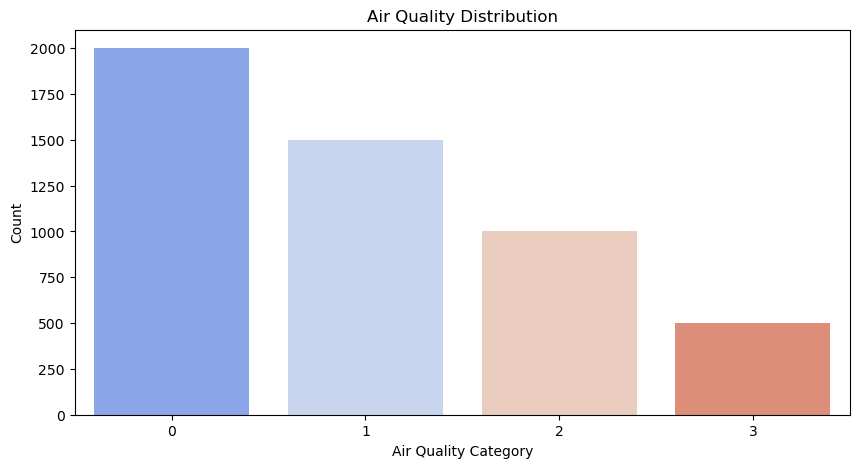

In [101]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=df['Air Quality'].value_counts().index, y=df['Air Quality'].value_counts(), palette='coolwarm')
plt.title('Air Quality Distribution')
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
plt.show()


In [107]:
from sklearn.preprocessing import LabelEncoder

# Convert all object columns to numerical
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print(df.head())  # Check if encoding worked



   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality        lat  \
0                            6.3                 319            1  28.313174   
1                            6.0                 611            1  26.588568   
2                            5.2                 619            1  31.074571   
3                           11.1                 551            0  26.595409   
4                           12.7                 303            0  32.757538   

         lon  Air Quality Category  
0  77.826502                     0  
1  75.097306                     0  
2  84.151523                     0  
3  78.774349    

In [109]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

X = df.drop(columns=['Air Quality Category'])  # Features
y = df['Air Quality Category']  # Target

param_grid = {
    'n_estimators': [100, 300], 
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\Ashu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [113]:
!pip install dash


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 10.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 9.9 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/8.0 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 9.3 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3580 sha256=38b32f3f2b23bbda79a07c8041976f70c34eff2e4f111667fcb1442a9162e0f0
  Stored in directory: c:\users\ashu\appdata\local\pip\cache\wheels\37\76\84\09143757ac9846675769f3649fc2aa936ec40255783a23ba52
Successfully built stringcase


       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%

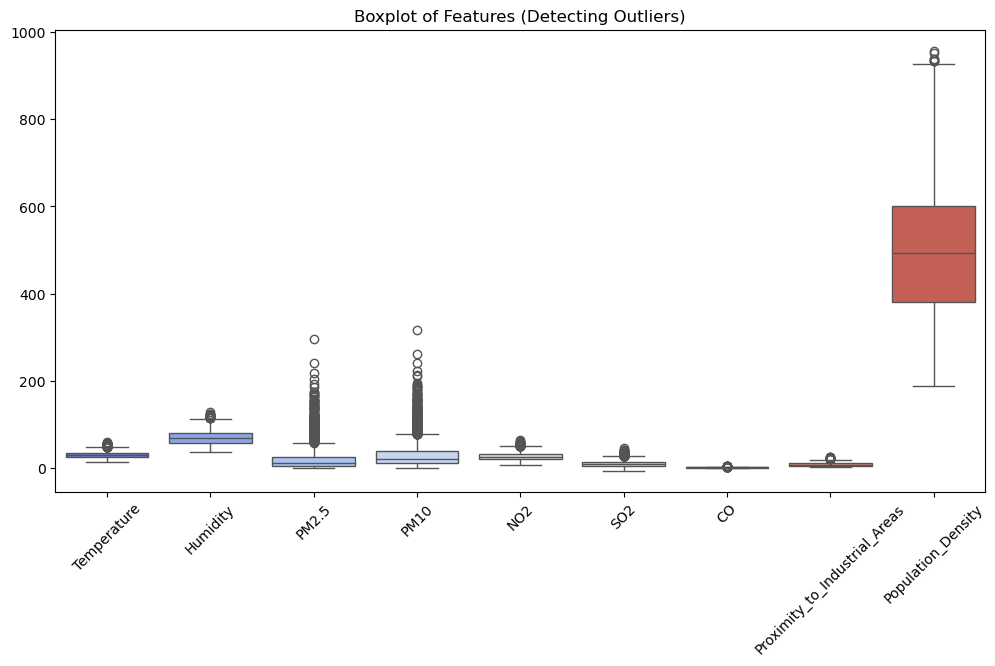

In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset (Replace with your actual dataset)
df = pd.read_csv("airquality.csv")  # Ensure the correct file path

# Display basic statistics
print(df.describe())

# Outlier Detection using IQR Method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detecting outliers for each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

print("Outlier Counts (IQR Method):", outlier_counts)

# Outlier Detection using Z-Score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64'])))
    outliers = (z_scores > threshold).sum(axis=0)
    return outliers

z_outliers = detect_outliers_zscore(df)
print("Outlier Counts (Z-Score Method):", z_outliers)

# Visualization: Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Detecting Outliers)")
plt.show()




In [123]:
# Removing Outliers using IQR
def remove_outliers(data):
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_cleaned = remove_outliers(df)
print("Dataset Shape After Removing Outliers:", df_cleaned.shape)

Dataset Shape After Removing Outliers: (4158, 10)


In [125]:
import folium
from folium.plugins import HeatMap

# Sample lat/lon data (replace with actual locations if available)
df['lat'] = np.random.uniform(25, 35, df.shape[0])
df['lon'] = np.random.uniform(75, 85, df.shape[0])

m = folium.Map(location=[30, 80], zoom_start=5)
HeatMap(df[['lat', 'lon', 'PM2.5']].values).add_to(m)
m


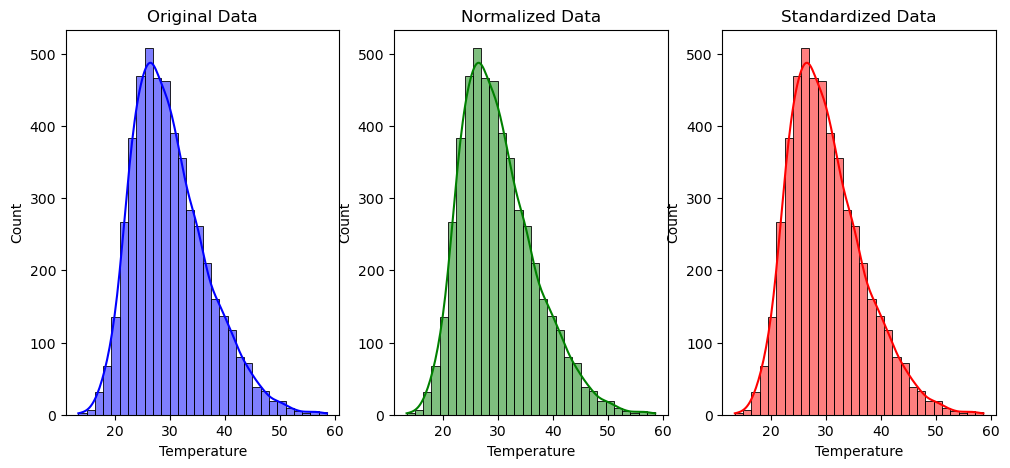

In [146]:

import matplotlib.pyplot as plt
import seaborn as sns

# Choose a numerical column for visualization (Replace 'column_name' with your actual column)
col = "Temperature"

plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 3, 1)
sns.histplot(df[col], bins=30, kde=True, color="blue")
plt.title("Original Data")

# Normalized Data
plt.subplot(1, 3, 2)
sns.histplot(df_normalized[col], bins=30, kde=True, color="green")
plt.title("Normalized Data")

# Standardized Data
plt.subplot(1, 3, 3)
sns.histplot(df_standardized[col], bins=30, kde=True, color="red")
plt.title("Standardized Data")

plt.show()



In [148]:
print("Original Data: Mean =", df[col].mean(), ", Std =", df[col].std())
print("Standardized Data: Mean =", df_standardized[col].mean(), ", Std =", df_standardized[col].std())


Original Data: Mean = 30.029020000000003 , Std = 6.72066137351523
Standardized Data: Mean = 30.029020000000003 , Std = 6.72066137351523
